# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')

In [7]:
male_df =  data.loc[data.Gender == "Male"]
female_df =  data.loc[data.Gender == "Female"]

In [12]:
male_df.Height.mean()
# Male Height mean: 69.02634590621737

69.02634590621737

In [17]:
male_df.Height.std()
# Male Height std: 2.8633622286606517

2.8633622286606517

In [18]:
male_df.Weight.mean()
# Male Weight mean: 187.0206206581929

187.0206206581929

In [19]:
male_df.Weight.std()
# Male Weight std: 19.781154516763813

19.781154516763813

In [20]:
female_df.Height.mean()
# Female Height mean: 63.708773603424916

63.708773603424916

In [21]:
female_df.Height.std()
# Female Height std: 2.696284015765056

2.696284015765056

In [22]:
female_df.Weight.mean()
# Female Weight mean: 135.8600930074687

135.8600930074687

In [23]:
female_df.Weight.std()
# Female Weight std: 19.022467805319007

19.022467805319007

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

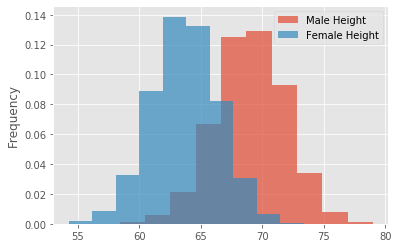

In [30]:
binsize = 10
a = .7
male_df.Height.plot.hist(bins = binsize, alpha = a, density = True, label = "Male Height")
female_df.Height.plot.hist(bins = binsize, alpha = a, density = True, label = "Female Height")
plt.legend()
plt.show()

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [32]:
def density(x, y=10):
    n, bins = np.histogram(x, y, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = (bins[k]+bins[k+1])/2
        pdfy[k] = n[k]
    
    return pdfx, pdfy

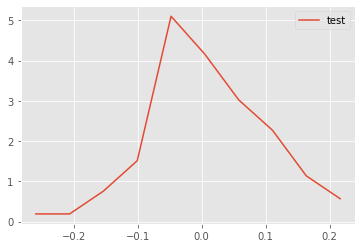

In [41]:
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

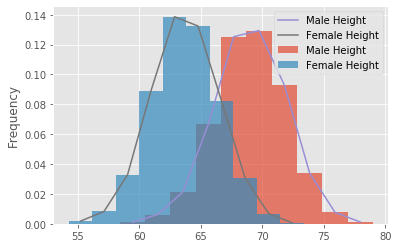

In [42]:
binsize = 10
a = .7
male_df.Height.plot.hist(bins = binsize, alpha = a, density = True, label = "Male Height")
female_df.Height.plot.hist(bins = binsize, alpha = a, density = True, label = "Female Height")
xm, ym = density(male_df.Height)
xf, yf = density(female_df.Height)
plt.plot(xm, ym, label = 'Male Height')
plt.plot(xf, yf, label = 'Female Height')
plt.legend()
plt.show()

## Repeat above exerice for male and female weights

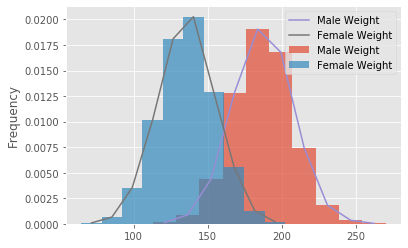

In [43]:
binsize = 10
a = .7
male_df.Weight.plot.hist(bins = binsize, alpha = a, density = True, label = "Male Weight")
female_df.Weight.plot.hist(bins = binsize, alpha = a, density = True, label = "Female Weight")
xm, ym = density(male_df.Weight)
xf, yf = density(female_df.Weight)
plt.plot(xm, ym, label = 'Male Weight')
plt.plot(xf, yf, label = 'Female Weight')
plt.legend()
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat Above experiments in seaborn and compare with your results

In [46]:
import seaborn as sns

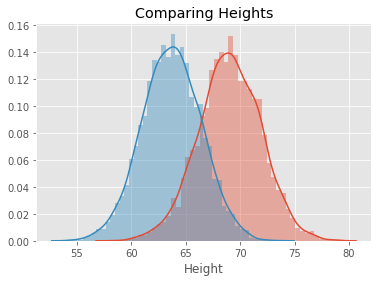

In [48]:
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title("Comparing Heights")
plt.show()

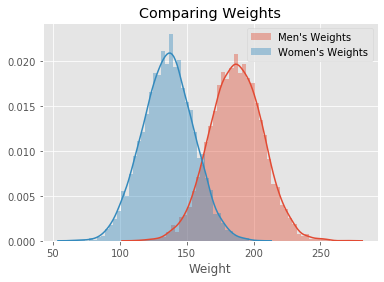

In [51]:
sns.distplot(male_df.Weight, label = "Men's Weights")
sns.distplot(female_df.Weight, label = "Women's Weights")
plt.title("Comparing Weights")
plt.legend()
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.